# Task 6 : Prediction using Decision Tree Algorithm

# GRIP @ The Sparks Foundation (July 2021)

## Author: Ridam Hazra
For the given 'Iris' dataset, I have tried to create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Tools used: Numpy, Pandas, Matplotlib, Scikit Learn, Seaborn 

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as sm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

## Step 1: Reading the data from source

In [2]:
# Load the iris dataset

df = pd.read_csv('Iris.csv',index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 2: Input Data Visualization 

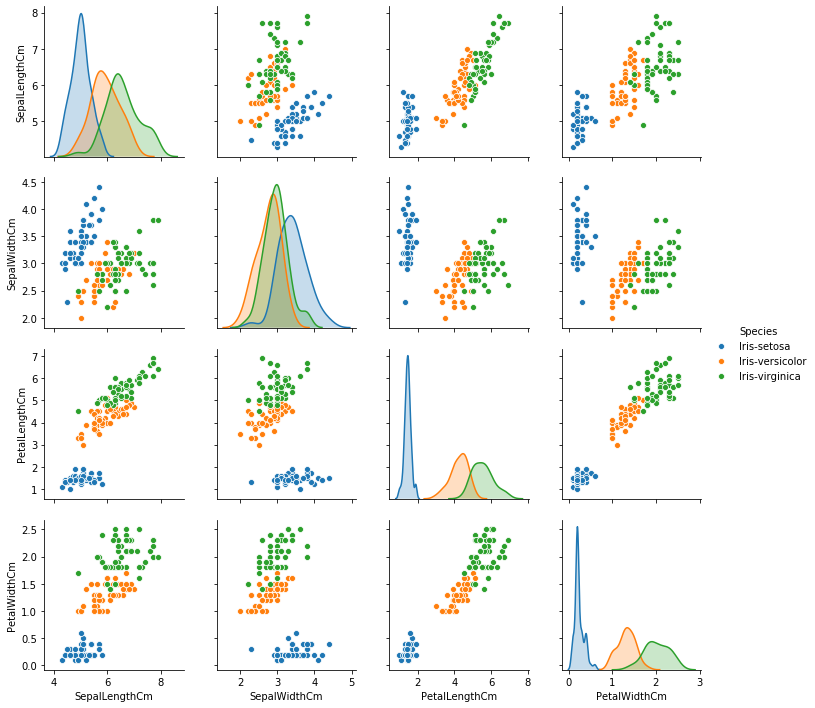

In [5]:
sns.pairplot(df, hue = 'Species')

#### Here, we can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other.

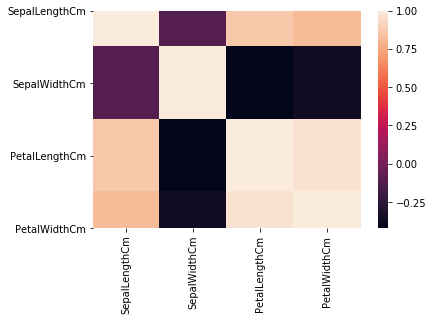

In [6]:
# Correlation matrix

sns.heatmap(df.corr())

#### Observations made: 
Petal length is highly related to petal width and Sepal lenth is not related sepal width. 

## Step 3: Data Preprocessing 

In [7]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species', axis =1)

df1.shape

(150, 4)

In [8]:
#  Defining the attributes and labels

X = df.iloc[:, [0, 1, 2, 3]].values # Attributes

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

y = df['Species'].values  # Labels

print("The shape of the data is: ", df.shape)

The shape of the data is:  (150, 5)


# Step 4: Model Training
Splitting the data into training and testing sets, and training the model.

In [9]:
# Splitting the data - 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42 )

print("Training split: ", X_train.shape)
print("Testing split: ", X_test.shape)

Training split:  (120, 4)
Testing split:  (30, 4)


In [10]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer is Created')

Decision Tree Classifer is Created


## Step 5: Classification Report and Confusion Matrix 

In [11]:
# Predicting the values of test data

y_pred = dtree.predict(X_test)

print("Classification report: \n\n", classification_report(y_test,y_pred))

Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0


The accuracy of this model is 1 or 100% since I have taken all the 4 features of the Iris dataset for creating the decision tree model.

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Step 6: Visualizing the trained Model 

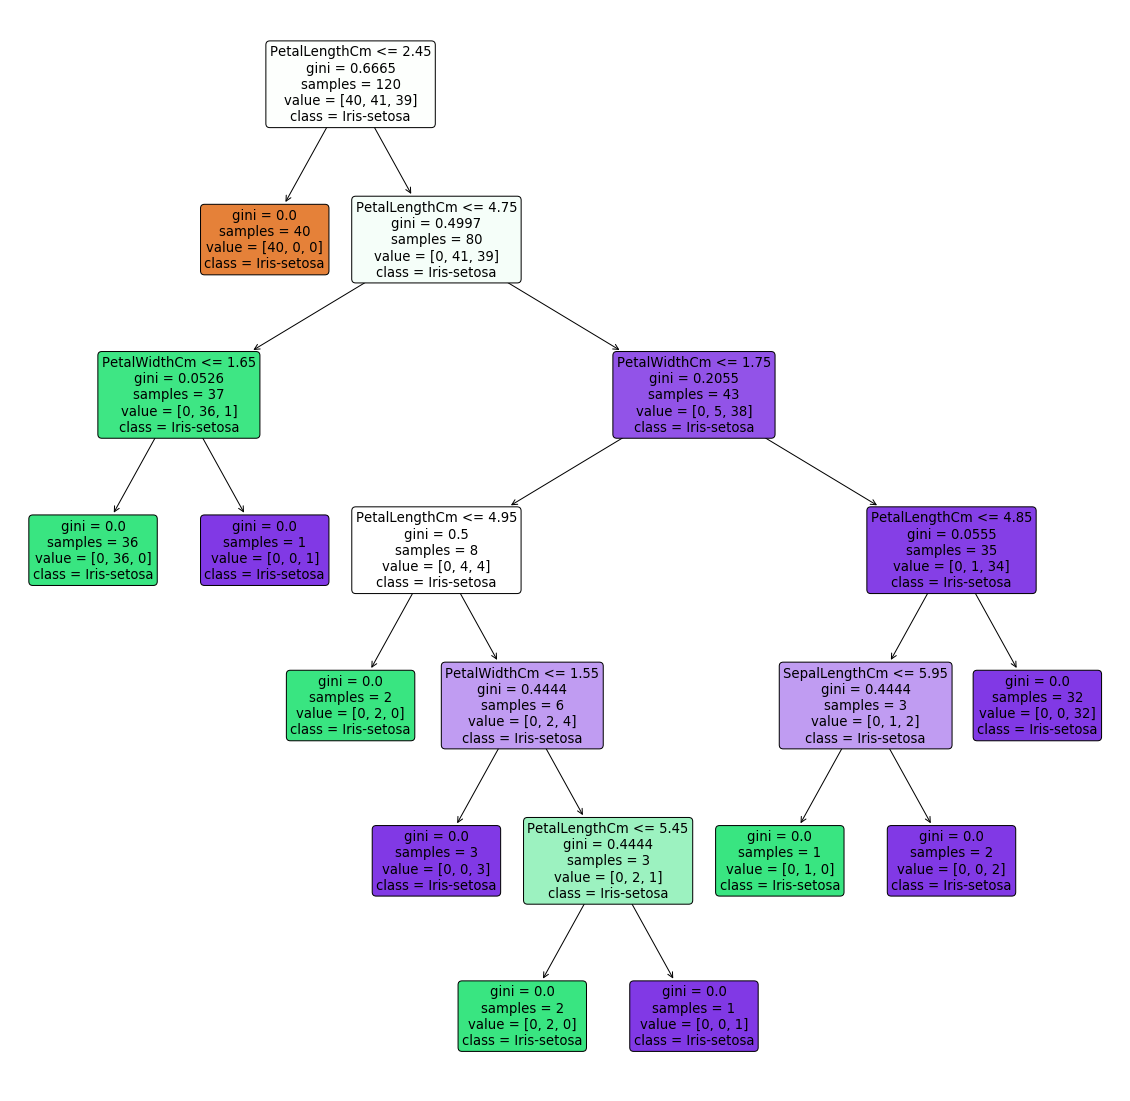

In [14]:
# Visualising the graph

plt.figure(figsize = (20,20))
dec_tree = plot_tree(dtree, feature_names = df1.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);

## Conclusion: 

### I was able to successfully create the Decision Tree classifier and visualized it graphically. And also carry-out prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score. 

Thank You!